In [6]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
import bokeh
import bokeh.io
import iqplot
bokeh.io.output_notebook()
#suppress warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
root = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"

#import data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rubio et al. 2021/gkaa1180_supplemental_files/Dataset_S1_mRNA_counts.xlsx taking together sheets: Cadmium, Heat Shock, H2O2, MMS, Sorbitol
for i in ["Cadmium", "Heat Shock", "H2O2", "MMS", "Sorbitol"]:
    df = pd.read_excel(root + 'external data/Rubio et al. 2021/gkaa1180_supplemental_files/Dataset_S1_mRNA_counts.xlsx', sheet_name=i, index_col=0)
    df = df.transpose()
    df = df.reset_index()
    df = df.rename(columns={'index': 'Sample'})
    df['Treatment'] = i
    if i == "Cadmium":
        df_rna = df
    else:
        df_rna = df_rna.append(df)

#In Sample, remove rna_ from start of each sample name. Then break Sample to 4 columns to genotype, treatment, time, replicate
df_rna['Sample'] = df_rna['Sample'].str.replace('rna_', '')
df_rna[['Genotype', 'Treatment', 'Time', 'Replicate']] = df_rna['Sample'].str.split('_', expand=True)


#same for RPF counts
for i in ["Cadmium", "Heat Shock", "H2O2", "MMS", "Sorbitol"]:
    df = pd.read_excel(root + 'external data/Rubio et al. 2021/gkaa1180_supplemental_files/Dataset_S2_RPF_counts.xlsx', sheet_name=i, index_col=0)
    df = df.transpose()
    df = df.reset_index()
    df = df.rename(columns={'index': 'Sample'})
    df['Treatment'] = i
    if i == "Cadmium":
        df_rpf = df
    else:
        df_rpf = df_rpf.append(df)


    
df_rpf['Sample'] = df_rpf['Sample'].str.replace('ribo_', '')
#check if sample name contains _"exp" and two numbers_ and remove that
df_rpf['Sample'] = df_rpf['Sample'].str.replace('_exp\d\d', '')
df_rpf[['Genotype', 'Treatment', 'Time', 'Replicate']] = df_rpf['Sample'].str.split('_', expand=True)


#in both dataaframes, go through the Genotype column and rename wt to WT, s52a to eIF2α (s52a) and sty1delta to sty1Δ
for i in [df_rna, df_rpf]:
    i['Genotype'] = i['Genotype'].str.replace('wt', 'WT')
    i['Genotype'] = i['Genotype'].str.replace('s52a', 'eIF2α (s52a)')
    i['Genotype'] = i['Genotype'].str.replace('sty1delta', 'sty1Δ')

df_rna["Treatment"]= np.array([["Cadmium"]*12, ["Heat Shock"]*12, ["Hydrogen Peroxide"]*12, ["Methyl Methanesulfonate"]*12, ["Sorbitol"]*12]).flatten()
df_rpf["Treatment"]= np.array([["Cadmium"]*12, ["Heat Shock"]*12, ["Hydrogen Peroxide"]*12, ["Methyl Methanesulfonate"]*12, ["Sorbitol"]*12]).flatten()
df_rna['Treatment applied'] = np.array([0,0,0,1,1,1,0,0,0,1,1,1]*5)
df_rpf['Treatment applied'] = np.array([0,0,0,1,1,1,0,0,0,1,1,1]*5)

    
#

    
 

Loading BokehJS ...

In [7]:
for i in [df_rna]:
    df_temp = i.drop(i.columns[0], axis=1)
    #save last 4 columns 
    saved = df_temp.iloc[:, -4:]
    df_temp = df_temp.drop(df_temp.columns[-5:], axis=1)
    df_temp = df_temp.transpose()
    #split up in treatment groups
    df_temp1 = df_temp.iloc[:, :12]
    df_temp2 = df_temp.iloc[:, 12:24]
    df_temp3 = df_temp.iloc[:, 24:36]
    df_temp4 = df_temp.iloc[:, 36:48]
    df_temp5 = df_temp.iloc[:, 48:60]
    for j,k in enumerate([df_temp1, df_temp2, df_temp3, df_temp4, df_temp5]):
        row_means = np.exp(np.mean(np.log(k+1),axis=1))
        i_ = k/row_means[:,None]
        col_medians = np.median(i_,axis=0)
        k = k/col_medians
        if j==0:
            df_final = k
        else:
            df_final = pd.concat([df_final, k], axis=1)
            
    df_final = df_final.transpose()
    df_final = pd.concat([df_final, saved], axis=1)
   

In [8]:
for i in [df_rpf]:
    df_temp = i.drop(i.columns[0], axis=1)
    #save last 4 columns 
    saved = df_temp.iloc[:, -4:]
    df_temp = df_temp.drop(df_temp.columns[-5:], axis=1)
    df_temp = df_temp.transpose()
    #split up in batches
    df_temp1 = df_temp.iloc[:, :12]
    df_temp2 = df_temp.iloc[:, 12:24]
    df_temp3 = df_temp.iloc[:, 24:36]
    df_temp4 = df_temp.iloc[:, 36:48]
    df_temp5 = df_temp.iloc[:, 48:60]
    for j,k in enumerate([df_temp1, df_temp2, df_temp3, df_temp4, df_temp5]):
        row_means = np.exp(np.mean(np.log(k+1),axis=1))
        i_ = k/row_means[:,None]
        col_medians = np.median(i_,axis=0)
        k = k/col_medians
        if j==0:
            df_final_rpf = k
        else:
            df_final_rpf = pd.concat([df_final_rpf, k], axis=1)
            
    df_final_rpf = df_final_rpf.transpose()
    df_final_rpf = pd.concat([df_final_rpf, saved], axis=1)
    
    #remove

In [9]:
#remove rows with eIF2α (s52a)
df_final = df_final[df_final['Genotype'] != 'eIF2α (s52a)']
df_rna = df_rna[df_rna['Genotype'] != 'eIF2α (s52a)']
#reset
df_final = df_final.reset_index(drop=True)
df_rna=df_rna.reset_index(drop=True)

#Treatment applied to True/False
df_final['Treatment applied'] = df_final['Treatment applied'].astype(bool)
#change true to Treatment applied and false to Untreated
df_final['Treatment applied'] = df_final['Treatment applied'].replace({True: 'Treatment applied', False: 'Untreated'})

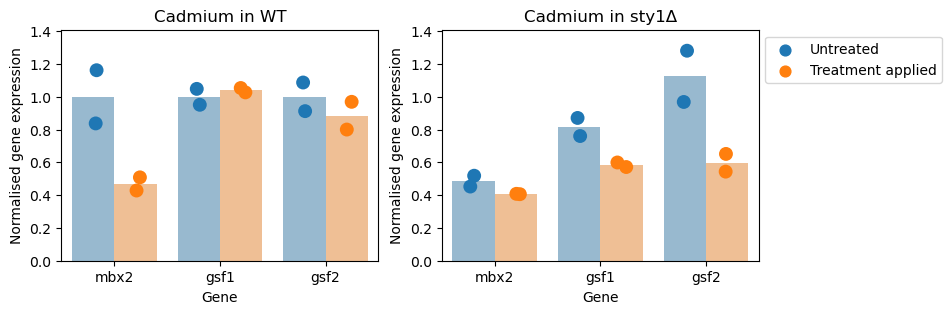

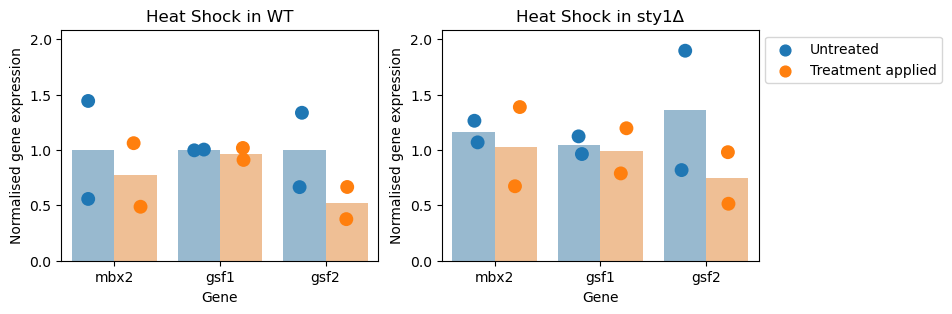

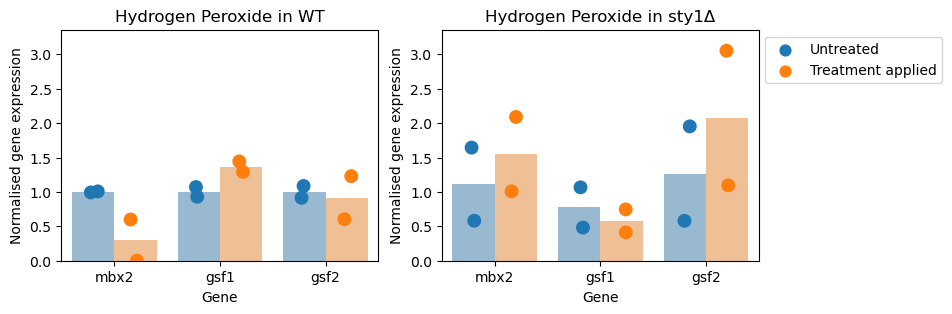

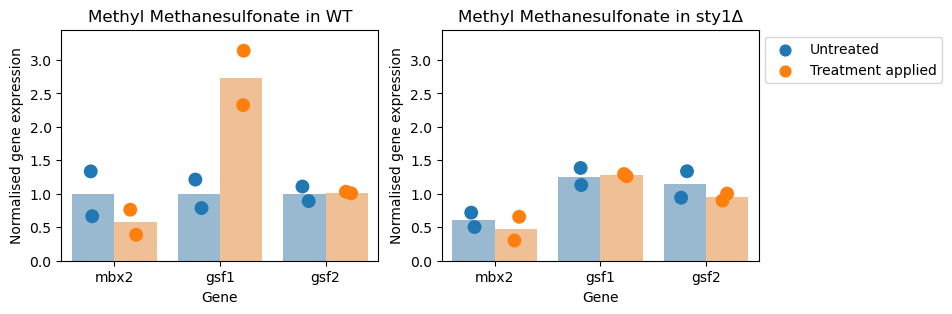

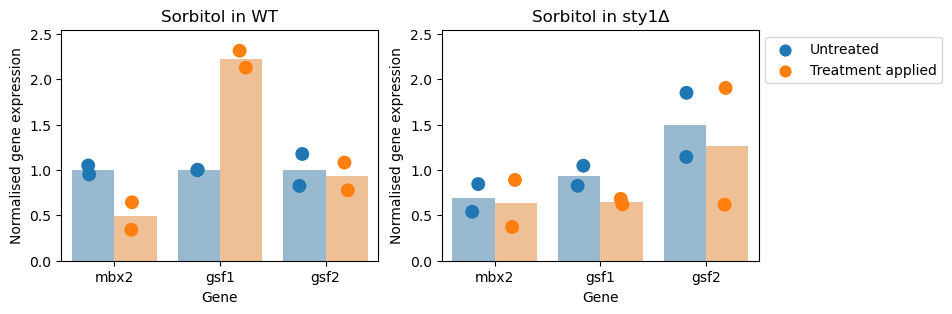

In [12]:
cols= ["SPBC317.01","SPBC15D4.02","SPCC1742.01","Genotype", "Treatment applied"]
names= ["mbx2", "gsf1", "gsf2"]
#create a sub_df with only the genes of interest
df_plot= df_final[df_final.columns[df_final.columns.isin(cols)]]
df_plot["Treatment"] = df_rna["Treatment"]
#add column called condition

for i in range(5):
      df_plot_temp= df_plot[df_plot["Treatment"]==df_plot["Treatment"].unique()[i]]
      
      #rename cols
      df_plot_temp = df_plot_temp.rename(columns={"SPBC317.01": "mbx2", "SPBC15D4.02": "gsf1", "SPCC1742.01": "gsf2"})
      #divide genes with average of wt treatment applied=0 and genotype=WT
      df_plot_temp["mbx2"] = df_plot_temp["mbx2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["mbx2"].mean()
      df_plot_temp["gsf1"] = df_plot_temp["gsf1"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf1"].mean()
      df_plot_temp["gsf2"] = df_plot_temp["gsf2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf2"].mean()
      

      #melt but make sure you keep values in treatment applied
      df_plot_temp= pd.melt(df_plot_temp, id_vars=["Treatment", "Genotype","Treatment applied"], value_vars=["mbx2", "gsf1", "gsf2"])
      
      #rename value to normalised gene expression
      #and variable to gene
      df_plot_temp = df_plot_temp.rename(columns={"value": "Normalised gene expression", "variable": "Gene"})


      #create two sns barplots next to each other, split by genotype. Each should be a barplot overlaid by a stripplot
      fig,axis = plt.subplots(1,2, figsize=(9,3))
      #remove errorbar
      a= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, alpha=0.5, ci=None)
      a= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, size=10)
      #title is treatment in genotype
      a.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in WT")
      #remove legend
      a.legend_.remove()
      #set y axis as max+10% for df_plot_temp
      a.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      
      #match y axis for both plots
      b= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, alpha=0.5,ci=None)
      b= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, size=10)
      b.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in sty1Δ")
      b.legend_.remove()
      b.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      #add legend for treatment applied
      handles, labels = b.get_legend_handles_labels()
      b.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(1.6, 1), ncol=1)
      #save fig as svg and png to root + Figures/All figures
      treatment = df_plot_temp["Treatment"].unique()[0]
      fig.savefig(root + "/Figures/All figures/fig"+str(treatment)+".svg", bbox_inches='tight', dpi=400)
      fig.savefig(root + "/Figures/All figures/fig"+str(treatment)+".png", bbox_inches='tight', dpi=400)
     
      

      




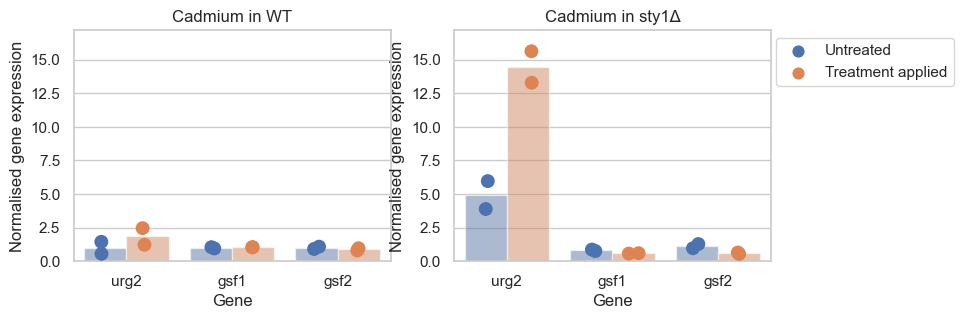

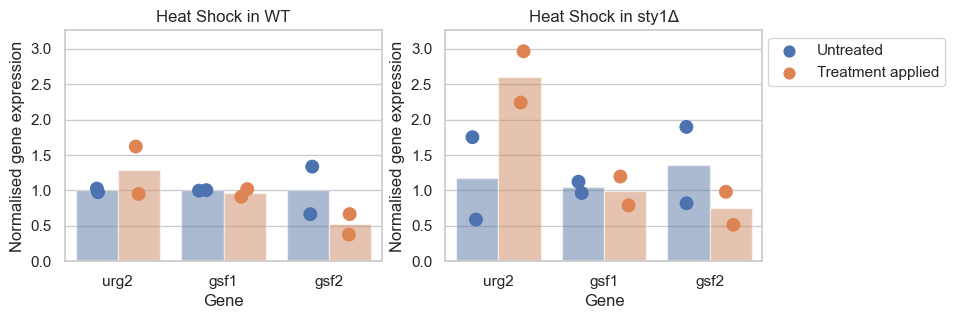

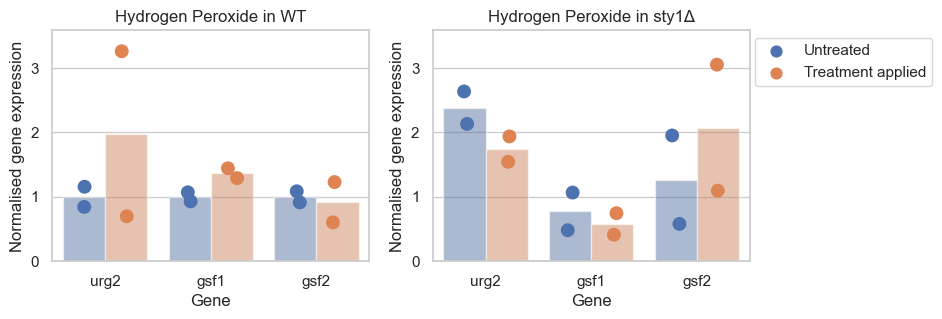

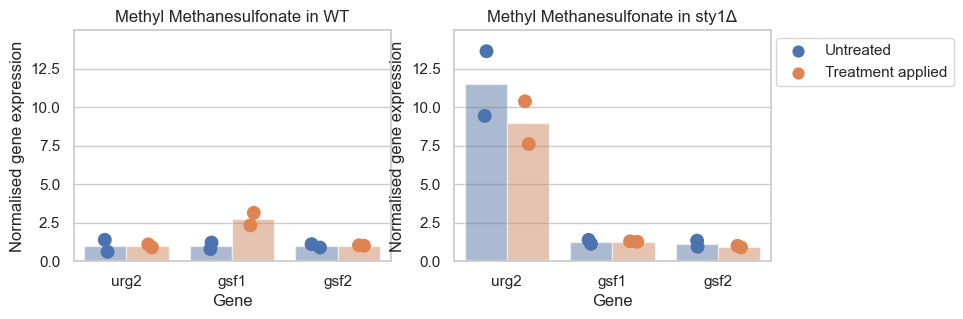

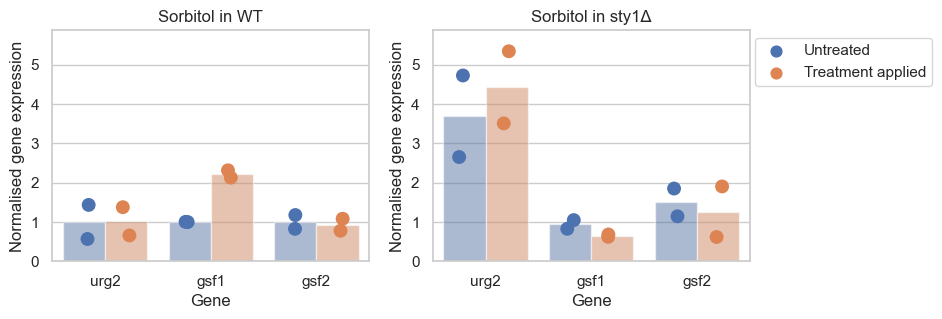

In [ ]:
cols= ["SPAC1002.17c","SPBC15D4.02","SPCC1742.01","Genotype", "Treatment applied"]
names= ["urg2", "gsf1", "gsf2"]
#create a sub_df with only the genes of interest
df_plot= df_final[df_final.columns[df_final.columns.isin(cols)]]
df_plot["Treatment"] = df_rna["Treatment"]
#add column called condition

for i in range(5):
      df_plot_temp= df_plot[df_plot["Treatment"]==df_plot["Treatment"].unique()[i]]
      
      #rename cols
      df_plot_temp = df_plot_temp.rename(columns={"SPAC1002.17c": "urg2", "SPBC15D4.02": "gsf1", "SPCC1742.01": "gsf2"})
      #divide genes with average of wt treatment applied=0 and genotype=WT
      df_plot_temp["urg2"] = df_plot_temp["urg2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["urg2"].mean()
      df_plot_temp["gsf1"] = df_plot_temp["gsf1"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf1"].mean()
      df_plot_temp["gsf2"] = df_plot_temp["gsf2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf2"].mean()
      

      #melt but make sure you keep values in treatment applied
      df_plot_temp= pd.melt(df_plot_temp, id_vars=["Treatment", "Genotype","Treatment applied"], value_vars=["urg2", "gsf1", "gsf2"])
      
      #rename value to normalised gene expression
      #and variable to gene
      df_plot_temp = df_plot_temp.rename(columns={"value": "Normalised gene expression", "variable": "Gene"})


      #create two sns barplots next to each other, split by genotype. Each should be a barplot overlaid by a stripplot
      fig,axis = plt.subplots(1,2, figsize=(9,3))
      #remove errorbar
      a= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, alpha=0.5, ci=None)
      a= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, size=10)
      #title is treatment in genotype
      a.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in WT")
      #remove legend
      a.legend_.remove()
      #set y axis as max+10% for df_plot_temp
      a.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      
      #match y axis for both plots
      b= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, alpha=0.5,ci=None)
      b= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, size=10)
      b.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in sty1Δ")
      b.legend_.remove()
      b.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      #add legend for treatment applied
      handles, labels = b.get_legend_handles_labels()
      b.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(1.6, 1), ncol=1)

In [13]:
#remove rows with eIF2α (s52a)
df_final_rpf = df_final_rpf[df_final_rpf['Genotype'] != 'eIF2α (s52a)']
df_rpf = df_final_rpf[df_final_rpf['Genotype'] != 'eIF2α (s52a)']
#reset
df_final_rpf = df_final_rpf.reset_index(drop=True)
df_rpf=df_rpf.reset_index(drop=True)

#Treatment applied to True/False
df_final_rpf['Treatment applied'] = df_final_rpf['Treatment applied'].astype(bool)
#change true to Treatment applied and false to Untreated
df_final_rpf['Treatment applied'] = df_final_rpf['Treatment applied'].replace({True: 'Treatment applied', False: 'Untreated'})

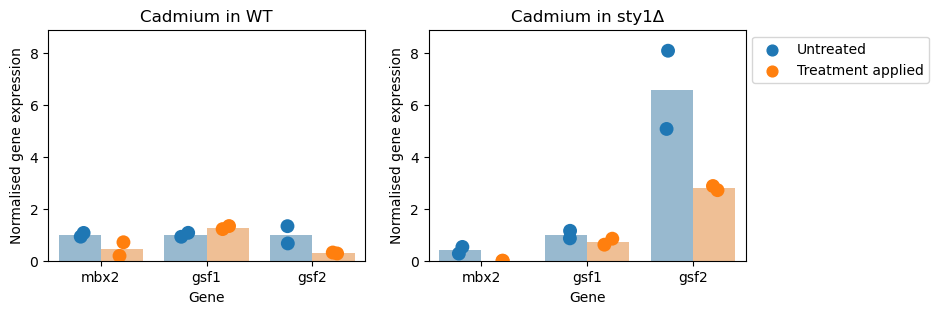

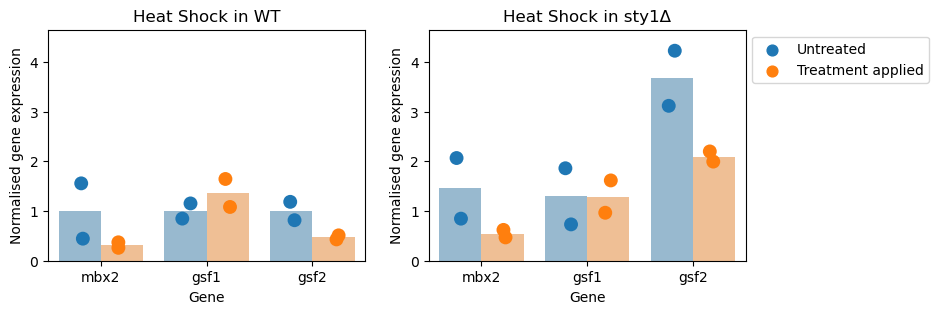

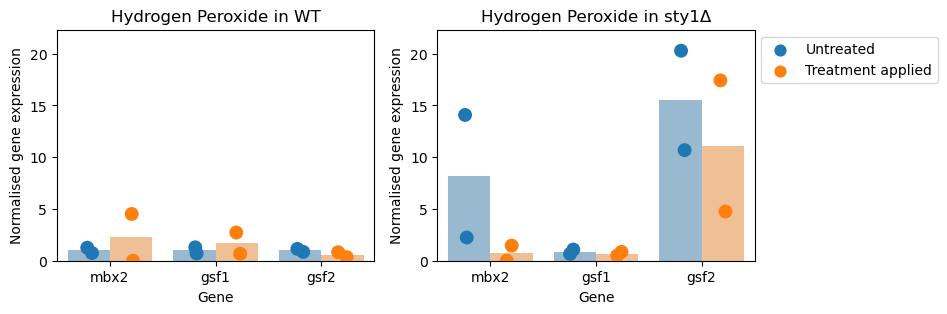

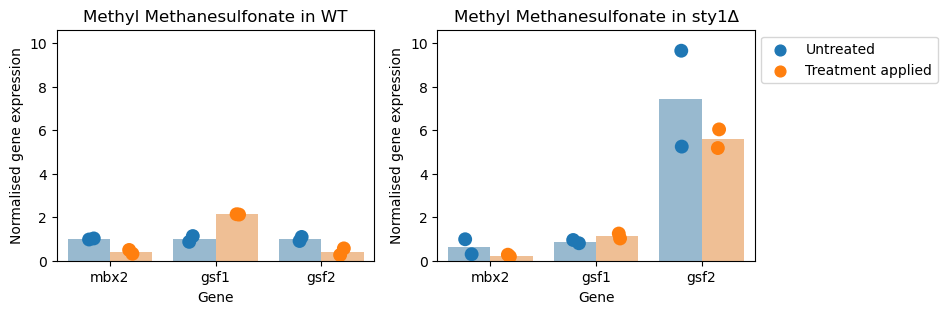

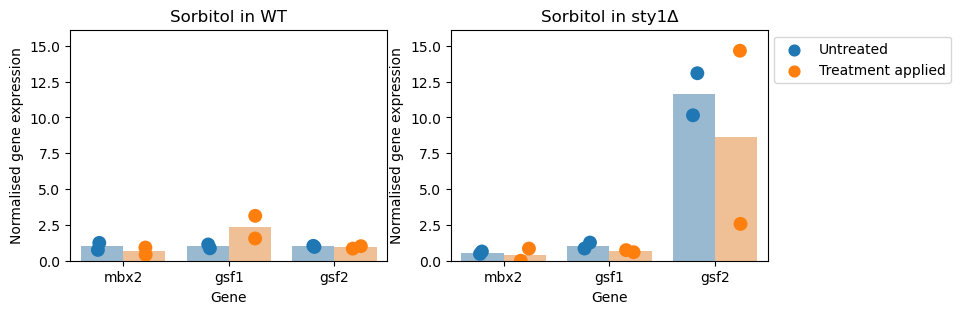

In [14]:
cols= ["SPBC317.01","SPBC15D4.02","SPCC1742.01","Genotype", "Treatment applied"]
names= ["mbx2", "gsf1", "gsf2"]
#create a sub_df with only the genes of interest
df_plot= df_final_rpf[df_final_rpf.columns[df_final_rpf.columns.isin(cols)]]
df_plot["Treatment"] = df_rna["Treatment"]
#add column called condition

for i in range(5):
      df_plot_temp= df_plot[df_plot["Treatment"]==df_plot["Treatment"].unique()[i]]
      
      #rename cols
      df_plot_temp = df_plot_temp.rename(columns={"SPBC317.01": "mbx2", "SPBC15D4.02": "gsf1", "SPCC1742.01": "gsf2"})
      #reove nans
      #remove inf 
      df_plot_temp = df_plot_temp.replace([np.inf, -np.inf], np.nan)
      df_plot_temp = df_plot_temp.dropna()

      #divide genes with average of wt treatment applied=0 and genotype=WT
      df_plot_temp["mbx2"] = df_plot_temp["mbx2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["mbx2"].mean()
      df_plot_temp["gsf1"] = df_plot_temp["gsf1"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf1"].mean()
      df_plot_temp["gsf2"] = df_plot_temp["gsf2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf2"].mean()
      

      #melt but make sure you keep values in treatment applied
      df_plot_temp= pd.melt(df_plot_temp, id_vars=["Treatment", "Genotype","Treatment applied"], value_vars=["mbx2", "gsf1", "gsf2"])
      
      #rename value to normalised gene expression
      #and variable to gene
      df_plot_temp = df_plot_temp.rename(columns={"value": "Normalised gene expression", "variable": "Gene"})
#remov inf 
      


      #create two sns barplots next to each other, split by genotype. Each should be a barplot overlaid by a stripplot
      fig,axis = plt.subplots(1,2, figsize=(9,3))
      #remove errorbar
      a= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, alpha=0.5, ci=None)
      a= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, size=10)
      #title is treatment in genotype
      a.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in WT")
      #remove legend
      a.legend_.remove()
      #set y axis as max+10% for df_plot_temp
      a.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      
      #match y axis for both plots
      b= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, alpha=0.5,ci=None)
      b= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, size=10)
      b.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in sty1Δ")
      b.legend_.remove()
      b.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      #add legend for treatment applied
      handles, labels = b.get_legend_handles_labels()
      b.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(1.6, 1), ncol=1)